# 1) Preparación previa

### Carga de librerías

In [1]:
import pandas as pd
import numpy as np
import re
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import scipy as sp
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

### Lectura del data set limpio

In [2]:
data = pd.read_csv("data_final.csv", sep = ";")
data.head(5)

,property_type,price,surface_covered_in_m2,Partido,precio_usd_por_m2,ambientes_train,ambientes_imputados,ambientes_final,balcon,parrilla,pileta,patio,quincho,gimnasio,sala_usos_multiples,cochera,seguridad,jardin,frente
0,PH,62000.0,40.0,Mataderos,1550.000000,2,0.0,2.0,NaN,NaN,NaN,patio,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,apartment,72000.0,55.0,Mataderos,1309.090909,2,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,apartment,64000.0,35.0,Mar del Plata,1828.571429,2,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,frente
3,PH,130000.0,78.0,Vicente López,1666.666667,0,3.0,3.0,NaN,NaN,NaN,patio,NaN,NaN,NaN,NaN,NaN,NaN,frente
4,apartment,138000.0,40.0,Belgrano,3450.000000,0,1.0,1.0,NaN,NaN,pileta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 2) Creación de dummies

### Partido

In [3]:
# Como hay muchísimos, se usará el dataset con solo los 50 partidos con más datos
grupo_partidos = data.groupby("Partido")
filtro_partidos = grupo_partidos[["Partido"]].describe()
data_partidos = filtro_partidos[filtro_partidos.Partido.freq > 289]
len(data_partidos)

50

In [4]:
mask_partidos = data['Partido'].isin(data_partidos.Partido.top)
data_para_dummies = data[mask_partidos]
data_para_dummies

,property_type,price,surface_covered_in_m2,Partido,precio_usd_por_m2,ambientes_train,ambientes_imputados,ambientes_final,balcon,parrilla,pileta,patio,quincho,gimnasio,sala_usos_multiples,cochera,seguridad,jardin,frente
2,apartment,64000.0,35.0,Mar del Plata,1828.571429,2,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,frente
3,PH,130000.0,78.0,Vicente López,1666.666667,0,3.0,3.0,NaN,NaN,NaN,patio,NaN,NaN,NaN,NaN,NaN,NaN,frente
4,apartment,138000.0,40.0,Belgrano,3450.000000,0,1.0,1.0,NaN,NaN,pileta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,apartment,195000.0,60.0,Belgrano,3250.000000,0,2.0,2.0,NaN,NaN,pileta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,apartment,115000.0,36.0,San Isidro,3194.444444,2,0.0,2.0,balcon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,frente
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71761,house,170000.0,130.0,Pilar,1307.692308,0,4.0,4.0,NaN,parrilla,pileta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71762,apartment,128000.0,35.0,Belgrano,3657.142857,0,1.0,1.0,NaN,parrilla,NaN,NaN,NaN,gimnasio,sum,cochera,NaN,NaN,frente
71763,apartment,165000.0,39.0,Recoleta,4230.769231,0,1.0,1.0,NaN,parrilla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,frente
71764,apartment,131500.0,39.0,Villa Urquiza,3371.794872,0,1.0,1.0,balcon,parrilla,NaN,NaN,NaN,NaN,NaN,cochera,NaN,NaN,NaN


In [5]:
dummy_partido = pd.get_dummies(data_para_dummies['Partido'], prefix='partido')
dummy_partido

,partido_Almagro,partido_Almirante Brown,partido_Avellaneda,partido_Bahía Blanca,partido_Balvanera,partido_Barracas,partido_Barrio Norte,partido_Belgrano,partido_Boedo,partido_Caballito,...,partido_San Telmo,partido_Tigre,partido_Tres de Febrero,partido_Vicente López,partido_Villa Carlos Paz,partido_Villa Crespo,partido_Villa Devoto,partido_Villa Luro,partido_Villa Urquiza,partido_Villa del Parque
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71761,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71762,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
71763,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71764,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Propiedades

In [6]:
dummy_prop = pd.get_dummies(data_para_dummies['property_type'], prefix='prop')
dummy_prop

,prop_PH,prop_apartment,prop_house
2,0,1,0
3,1,0,0
4,0,1,0
5,0,1,0
6,0,1,0
...,...,...,...
71761,0,0,1
71762,0,1,0
71763,0,1,0
71764,0,1,0


### Ambientes

In [7]:
dummy_amb = pd.get_dummies(data_para_dummies['ambientes_final'], prefix='amb')
dummy_amb

,amb_1.0,amb_2.0,amb_3.0,amb_4.0,amb_5.0,amb_6.0,amb_7.0
2,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0
5,0,1,0,0,0,0,0
6,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
71761,0,0,0,1,0,0,0
71762,1,0,0,0,0,0,0
71763,1,0,0,0,0,0,0
71764,1,0,0,0,0,0,0


### Balcón

In [8]:
dummy_balcon = pd.get_dummies(data_para_dummies['balcon'], prefix = "dummy")
dummy_balcon

,dummy_balcon
2,0
3,0
4,0
5,0
6,1
...,...
71761,0
71762,0
71763,0
71764,1


### Parrilla

In [9]:
dummy_parrilla = pd.get_dummies(data_para_dummies['parrilla'], prefix = "dummy")
dummy_parrilla

,dummy_parrilla
2,0
3,0
4,0
5,0
6,0
...,...
71761,1
71762,1
71763,1
71764,1


### Pileta

In [10]:
dummy_pileta = pd.get_dummies(data_para_dummies['pileta'], prefix = "dummy")
dummy_pileta

,dummy_pileta
2,0
3,0
4,1
5,1
6,0
...,...
71761,1
71762,0
71763,0
71764,0


### Patio

In [11]:
dummy_patio = pd.get_dummies(data_para_dummies['patio'], prefix = "dummy")
dummy_patio

,dummy_patio
2,0
3,1
4,0
5,0
6,0
...,...
71761,0
71762,0
71763,0
71764,0


### Quincho

In [12]:
dummy_quincho = pd.get_dummies(data_para_dummies['quincho'], prefix = "dummy")
dummy_quincho

,dummy_quincho
2,0
3,0
4,0
5,0
6,0
...,...
71761,0
71762,0
71763,0
71764,0


### Gimnasio

In [13]:
dummy_gimnasio = pd.get_dummies(data_para_dummies['gimnasio'], prefix = "dummy")
dummy_gimnasio

,dummy_gimnasio
2,0
3,0
4,0
5,0
6,0
...,...
71761,0
71762,1
71763,0
71764,0


### SUM

In [14]:
dummy_sum = pd.get_dummies(data_para_dummies['sala_usos_multiples'], prefix = "dummy")
dummy_sum

,dummy_sum
2,0
3,0
4,0
5,0
6,0
...,...
71761,0
71762,1
71763,0
71764,0


### Cochera

In [15]:
dummy_cochera = pd.get_dummies(data_para_dummies['cochera'], prefix = "dummy")
dummy_cochera

,dummy_cochera
2,0
3,0
4,0
5,0
6,0
...,...
71761,0
71762,1
71763,0
71764,1


### Seguridad

In [16]:
dummy_seguridad = pd.get_dummies(data_para_dummies['seguridad'], prefix = "dummy")
dummy_seguridad

,dummy_seguridad
2,0
3,0
4,0
5,0
6,0
...,...
71761,0
71762,0
71763,0
71764,0


### Jardín

In [17]:
dummy_jardin = pd.get_dummies(data_para_dummies['jardin'], prefix = "dummy")
dummy_jardin

,dummy_jardin
2,0
3,0
4,0
5,0
6,0
...,...
71761,0
71762,0
71763,0
71764,0


### Frente

In [18]:
dummy_frente = pd.get_dummies(data_para_dummies['frente'], prefix = "dummy")
dummy_frente

,dummy_frente
2,1
3,1
4,0
5,0
6,1
...,...
71761,0
71762,1
71763,1
71764,0


In [19]:
dummy_amenities = dummy_balcon.dummy_balcon + dummy_parrilla.dummy_parrilla + dummy_pileta.dummy_pileta + dummy_patio.dummy_patio + dummy_quincho.dummy_quincho + dummy_gimnasio.dummy_gimnasio + dummy_sum.dummy_sum + dummy_cochera.dummy_cochera + dummy_seguridad.dummy_seguridad + dummy_jardin.dummy_jardin + dummy_frente.dummy_frente
dummy_amenities.name = "dummy_amenities"

In [20]:
dummy_amenities.value_counts()

1     16726
2     15485
0     11093
3      9686
4      5526
5      2665
6       994
7       402
8        38
10        4
9         2
Name: dummy_amenities, dtype: int64

### Unificación de dummies en un dataset

In [21]:
data_con_dummies = pd.concat([data_para_dummies, dummy_amenities, dummy_partido, dummy_prop, dummy_amb],axis=1)
data_con_dummies.columns

Index(['property_type', 'price', 'surface_covered_in_m2', 'Partido',
       'precio_usd_por_m2', 'ambientes_train', 'ambientes_imputados',
       'ambientes_final', 'balcon', 'parrilla', 'pileta', 'patio', 'quincho',
       'gimnasio', 'sala_usos_multiples', 'cochera', 'seguridad', 'jardin',
       'frente', 'dummy_amenities', 'partido_Almagro',
       'partido_Almirante Brown', 'partido_Avellaneda', 'partido_Bahía Blanca',
       'partido_Balvanera', 'partido_Barracas', 'partido_Barrio Norte',
       'partido_Belgrano', 'partido_Boedo', 'partido_Caballito',
       'partido_Colegiales', 'partido_Córdoba', 'partido_Escobar',
       'partido_Esteban Echeverría', 'partido_Ezeiza', 'partido_Flores',
       'partido_Floresta', 'partido_General San Martín', 'partido_Ituzaingó',
       'partido_La Matanza', 'partido_La Plata', 'partido_Lanús',
       'partido_Lomas de Zamora', 'partido_Mar del Plata', 'partido_Monserrat',
       'partido_Moreno', 'partido_Morón', 'partido_Nuñez', 'partido_Pal

# 3) Creación de modelo uninominal

## Aplicación en todo el dataset

In [22]:
X_train_todo_dataset = data_con_dummies[data_con_dummies.ambientes_imputados == 0].drop(["property_type", "price", "surface_covered_in_m2", "Partido", "ambientes_train",
                                                                          "ambientes_imputados", "ambientes_final", "balcon", "parrilla", "pileta", "patio",
                                                                          "quincho", "gimnasio", "sala_usos_multiples", "cochera", "seguridad", "jardin", "frente"], axis = 1)
X_test_todo_dataset = data_con_dummies[data_con_dummies.ambientes_train == 0].drop(["property_type", "price", "surface_covered_in_m2", "Partido", "ambientes_train",
                                                                          "ambientes_imputados", "ambientes_final", "balcon", "parrilla", "pileta", "patio",
                                                                          "quincho", "gimnasio", "sala_usos_multiples", "cochera", "seguridad", "jardin", "frente"], axis = 1)
Y_train_todo_dataset = X_train_todo_dataset["precio_usd_por_m2"]
Y_test_todo_dataset = X_test_todo_dataset["precio_usd_por_m2"]

X_train_todo_dataset.drop(["precio_usd_por_m2"], axis = 1, inplace = True)
X_test_todo_dataset.drop(["precio_usd_por_m2"], axis = 1, inplace = True)

In [23]:
data_con_dummies.shape

(62621, 80)

In [24]:
X_train_todo_dataset.columns

Index(['dummy_amenities', 'partido_Almagro', 'partido_Almirante Brown',
       'partido_Avellaneda', 'partido_Bahía Blanca', 'partido_Balvanera',
       'partido_Barracas', 'partido_Barrio Norte', 'partido_Belgrano',
       'partido_Boedo', 'partido_Caballito', 'partido_Colegiales',
       'partido_Córdoba', 'partido_Escobar', 'partido_Esteban Echeverría',
       'partido_Ezeiza', 'partido_Flores', 'partido_Floresta',
       'partido_General San Martín', 'partido_Ituzaingó', 'partido_La Matanza',
       'partido_La Plata', 'partido_Lanús', 'partido_Lomas de Zamora',
       'partido_Mar del Plata', 'partido_Monserrat', 'partido_Moreno',
       'partido_Morón', 'partido_Nuñez', 'partido_Palermo', 'partido_Pilar',
       'partido_Pinamar', 'partido_Punilla', 'partido_Quilmes',
       'partido_Recoleta', 'partido_Rosario', 'partido_Saavedra',
       'partido_San Cristobal', 'partido_San Fernando', 'partido_San Isidro',
       'partido_San Miguel', 'partido_San Telmo', 'partido_Tigre',
    

#### Creación de los elementos a utilizar

In [25]:
lm_todo_dataset = linear_model.LinearRegression()
# Fiteamos el modelo sobre los vectores X e Y.
model_todo_dataset = lm_todo_dataset.fit(X_train_todo_dataset, Y_train_todo_dataset)

#### Aplicación del modelo en los datos

In [26]:
# Guardamos  las predicciones en un nuevo vector que llamaremos predictions.
predictions_todo_dataset = lm_todo_dataset.predict(X_test_todo_dataset)

# Imprimimos el intercepto y los coeficientes como atributos del objeto entrenado.
print ('Intercepto =', model_todo_dataset.intercept_)
print ('RM =', model_todo_dataset.coef_)

# Imprimos la metrica que mide la bondad de ajusto del modelo. En este caso el R2.
print ('R2_train =', model_todo_dataset.score(X_train_todo_dataset, Y_train_todo_dataset))

Intercepto = 1651497354412168.2
RM = [ 6.49392431e+01  3.72125512e+14  3.72125512e+14  3.72125512e+14
  3.72125512e+14  3.72125512e+14  3.72125512e+14  3.72125512e+14
  3.72125512e+14  3.72125512e+14  3.72125512e+14  3.72125512e+14
  3.72125512e+14  3.72125512e+14  3.72125512e+14  3.72125512e+14
  3.72125512e+14  3.72125512e+14  3.72125512e+14  3.72125512e+14
  3.72125512e+14  3.72125512e+14  3.72125512e+14  3.72125512e+14
  3.72125512e+14  3.72125512e+14  3.72125512e+14  3.72125512e+14
  3.72125512e+14  3.72125512e+14  3.72125512e+14  3.72125512e+14
  3.72125512e+14  3.72125512e+14  3.72125512e+14  3.72125512e+14
  3.72125512e+14  3.72125512e+14  3.72125512e+14  3.72125512e+14
  3.72125512e+14  3.72125512e+14  3.72125512e+14  3.72125512e+14
  3.72125512e+14  3.72125512e+14  3.72125512e+14  3.72125512e+14
  3.72125512e+14  3.72125512e+14  3.72125512e+14 -9.23656820e+14
 -9.23656820e+14 -9.23656820e+14 -1.09996605e+15 -1.09996605e+15
 -1.09996605e+15 -1.09996605e+15 -1.09996605e+15 -1.0

#### Obtención de métricas

In [27]:
#media del precio_usd_por_m2
data_con_dummies.precio_usd_por_m2.mean()

2144.7300796479353

In [28]:
# Error absoluto de la media
mean_absolute_error(Y_test_todo_dataset, predictions_todo_dataset)

397.4560845822503

In [29]:
# Raiz cuadrada de la media del error
mean_squared_error(Y_test_todo_dataset, predictions_todo_dataset)

295131.3959073914

In [30]:
# Raiz cuadrada de la media del error
RMSE = np.sqrt(mean_squared_error(Y_test_todo_dataset, predictions_todo_dataset))
RMSE

543.2599708310851

#### Análisis para Regresion Lineal

En primer lugar, se obtiene el conjunto de datos residuales y se los grafica para observar su distribución.

In [31]:
test_residuals = Y_test_todo_dataset - predictions_todo_dataset

<AxesSubplot:xlabel='precio_usd_por_m2'>

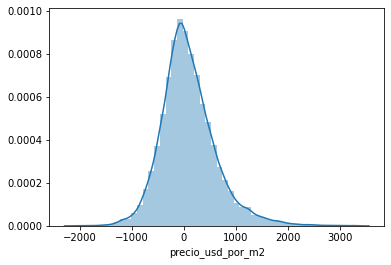

In [32]:
sns.distplot(test_residuals, kde = True)

La distribucion de los Errores Residuales pareciera ser una Normal con media en 0. Igualmente, podría haber ser un caso del Cuarteto de Anscombe por lo que se procede graficando la probabilidad en torno a los quantiles.

((array([-4.00199854, -3.7870279 , -3.66944762, ...,  3.66944762,
          3.7870279 ,  4.00199854]),
  array([-2105.65909091, -2094.94387755, -2047.55769231, ...,
          3263.35449735,  3314.03571429,  3370.9       ])),
 (525.4023215775021, 90.55503658660638, 0.9806798710207816))

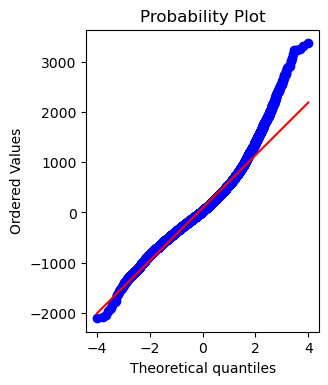

In [33]:
fig,ax = plt.subplots(figsize = (3,4), dpi = 100)
sp.stats.probplot(test_residuals,plot = ax)

Con este gráfico se corrobora efectivamente que la distribución de los Errores Residuales se aproxima a una Distribución Normal y, por ende, se puede proceder con la creación de la regresion lineal.

Text(0, 0.5, 'Error residual de Y test en precio por M2 en dólares')

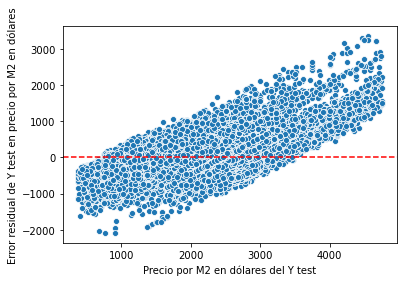

In [34]:
sns.scatterplot(x = Y_test_todo_dataset, y = test_residuals)
plt.axhline(y = 0, color = 'r', ls = "--")
plt.xlabel("Precio por M2 en dólares del Y test")
plt.ylabel("Error residual de Y test en precio por M2 en dólares")

## Regresión lineal entre superficie cubierta y precio por m2 en dólares

In [35]:
X_train_superficie = data_con_dummies[data_con_dummies.ambientes_imputados == 0].drop(['property_type', 'price', 'Partido', 'ambientes_train', 'ambientes_imputados',
       'ambientes_final', 'balcon', 'parrilla', 'pileta', 'patio', 'quincho',
       'gimnasio', 'sala_usos_multiples', 'cochera', 'seguridad', 'jardin',
       'frente', 'dummy_amenities', 'partido_Almagro',
       'partido_Almirante Brown', 'partido_Avellaneda', 'partido_Bahía Blanca',
       'partido_Balvanera', 'partido_Barracas', 'partido_Barrio Norte',
       'partido_Belgrano', 'partido_Boedo', 'partido_Caballito',
       'partido_Colegiales', 'partido_Córdoba', 'partido_Escobar',
       'partido_Esteban Echeverría', 'partido_Ezeiza', 'partido_Flores',
       'partido_Floresta', 'partido_General San Martín', 'partido_Ituzaingó',
       'partido_La Matanza', 'partido_La Plata', 'partido_Lanús',
       'partido_Lomas de Zamora', 'partido_Mar del Plata', 'partido_Monserrat',
       'partido_Moreno', 'partido_Morón', 'partido_Nuñez', 'partido_Palermo',
       'partido_Pilar', 'partido_Pinamar', 'partido_Punilla',
       'partido_Quilmes', 'partido_Recoleta', 'partido_Rosario',
       'partido_Saavedra', 'partido_San Cristobal', 'partido_San Fernando',
       'partido_San Isidro', 'partido_San Miguel', 'partido_San Telmo',
       'partido_Tigre', 'partido_Tres de Febrero', 'partido_Vicente López',
       'partido_Villa Carlos Paz', 'partido_Villa Crespo',
       'partido_Villa Devoto', 'partido_Villa Luro', 'partido_Villa Urquiza',
       'partido_Villa del Parque', 'prop_PH', 'prop_apartment', 'prop_house',
       'amb_1.0', 'amb_2.0', 'amb_3.0', 'amb_4.0', 'amb_5.0', 'amb_6.0',
       'amb_7.0'], axis = 1)
X_test_superficie = data_con_dummies[data_con_dummies.ambientes_train == 0].drop(['property_type', 'price', 'Partido', 'ambientes_train', 'ambientes_imputados',
       'ambientes_final', 'balcon', 'parrilla', 'pileta', 'patio', 'quincho',
       'gimnasio', 'sala_usos_multiples', 'cochera', 'seguridad', 'jardin',
       'frente', 'dummy_amenities', 'partido_Almagro',
       'partido_Almirante Brown', 'partido_Avellaneda', 'partido_Bahía Blanca',
       'partido_Balvanera', 'partido_Barracas', 'partido_Barrio Norte',
       'partido_Belgrano', 'partido_Boedo', 'partido_Caballito',
       'partido_Colegiales', 'partido_Córdoba', 'partido_Escobar',
       'partido_Esteban Echeverría', 'partido_Ezeiza', 'partido_Flores',
       'partido_Floresta', 'partido_General San Martín', 'partido_Ituzaingó',
       'partido_La Matanza', 'partido_La Plata', 'partido_Lanús',
       'partido_Lomas de Zamora', 'partido_Mar del Plata', 'partido_Monserrat',
       'partido_Moreno', 'partido_Morón', 'partido_Nuñez', 'partido_Palermo',
       'partido_Pilar', 'partido_Pinamar', 'partido_Punilla',
       'partido_Quilmes', 'partido_Recoleta', 'partido_Rosario',
       'partido_Saavedra', 'partido_San Cristobal', 'partido_San Fernando',
       'partido_San Isidro', 'partido_San Miguel', 'partido_San Telmo',
       'partido_Tigre', 'partido_Tres de Febrero', 'partido_Vicente López',
       'partido_Villa Carlos Paz', 'partido_Villa Crespo',
       'partido_Villa Devoto', 'partido_Villa Luro', 'partido_Villa Urquiza',
       'partido_Villa del Parque', 'prop_PH', 'prop_apartment', 'prop_house',
       'amb_1.0', 'amb_2.0', 'amb_3.0', 'amb_4.0', 'amb_5.0', 'amb_6.0',
       'amb_7.0'], axis = 1)
Y_train_superficie = X_train_superficie["precio_usd_por_m2"]
Y_test_superficie = X_test_superficie["precio_usd_por_m2"]

X_train_superficie.drop(["precio_usd_por_m2"], axis = 1, inplace = True)
X_test_superficie.drop(["precio_usd_por_m2"], axis = 1, inplace = True)

In [36]:
lm_superficie = linear_model.LinearRegression()
# Fiteamos el modelo sobre los vectores X e Y.
model_superficie = lm_superficie.fit(X_train_superficie, Y_train_superficie)

In [37]:
# Guardamos  las predicciones en un nuevo vector que llamaremos predictions.
predictions_superficie = lm_superficie.predict(X_test_superficie)

# Imprimimos el intercepto y los coeficientes como atributos del objeto entrenado.
print ('Intercepto =', model_superficie.intercept_)
print ('RM =', model_superficie.coef_)

# Imprimos la metrica que mide la bondad de ajusto del modelo. En este caso el R2.
print ('R2_train =', model_superficie.score(X_train_superficie, Y_train_superficie))

Intercepto = 2625.7158102776366
RM = [-4.64378349]
R2_train = 0.08378760201532154


In [38]:
test_residuals_superficie = Y_test_superficie - predictions_superficie

Text(0, 0.5, 'Error residual de Y test en precio por M2 en dólares')

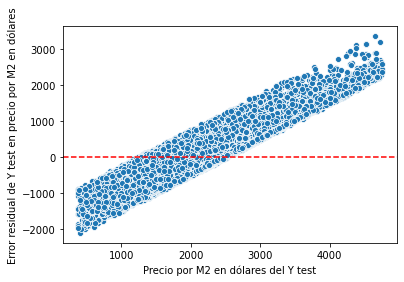

In [39]:
sns.scatterplot(x = Y_test_superficie, y = test_residuals_superficie)
plt.axhline(y = 0, color = 'r', ls = "--")
plt.xlabel("Precio por M2 en dólares del Y test")
plt.ylabel("Error residual de Y test en precio por M2 en dólares")

In [40]:
# Imprimos la metrica que mide la bondad de ajusto del modelo. En este caso el R2.
R2_train_superficie = model_superficie.score(X_train_superficie, Y_train_superficie)
R2_train_superficie

0.08378760201532154

In [41]:
# Error absoluto de la media
MAE_Test_superficie = mean_absolute_error(Y_test_superficie, predictions_superficie)
MAE_Test_superficie

630.7234348523389

In [42]:
# Raiz cuadrada de la media del error
MSE_Test_superficie = mean_squared_error(Y_test_superficie, predictions_superficie)
MSE_Test_superficie

616548.9623586925

In [43]:
RMSE_Test_superficie = np.sqrt(mean_squared_error(Y_test_superficie, predictions_superficie))
RMSE_Test_superficie

785.2063183384942

Se crea un diccionario con los datos que se recopilan de ahora en adelante, así se comparan al final de la notebook 3

In [44]:
revision_datos = [ {'subconjunto': 'Superficie Cubierta',
    'R2_train': R2_train_superficie.round(4),
    'MAE': MAE_Test_superficie.round(4),
    'MSE': MSE_Test_superficie.round(4),
    'RMSE': RMSE_Test_superficie.round(4)}]

# 5) Creación de modelo polinomial

In [45]:
poly_train = PolynomialFeatures(2)
poly_features_train = poly_train.fit_transform(X_train_todo_dataset)

In [46]:
poly_test = PolynomialFeatures(2)
poly_features_test = poly_test.fit_transform(X_test_todo_dataset)

In [47]:
# X_train_todo_dataset, X_test_todo_dataset, Y_train_todo_dataset, Y_test_todo_dataset = train_test_split (poly_features, Y_train_todo_dataset, test_size = 0.3, random_state = 101)

In [48]:
poly_model = linear_model.LinearRegression()

In [49]:
poly_predictions = poly_model.fit(poly_features_train, Y_train_todo_dataset).predict(poly_features_test)

In [50]:
print ('R2_train =', poly_model.score(poly_features_train, Y_train_todo_dataset))

R2_train = 0.582936429616381


In [51]:
poly_model.coef_

array([-4.38541011e+13, -1.05283682e+14, -6.02813017e+13, ...,
       -3.33134090e+14,  0.00000000e+00, -1.98100843e+14])

In [52]:
MAE = mean_absolute_error(Y_test_todo_dataset, poly_predictions)
MAE

11195463428.070232

In [53]:
MSE = mean_squared_error(Y_test_todo_dataset, poly_predictions)
MSE

5.37912044885573e+23

In [54]:
RMSE = np.sqrt(MSE)
RMSE

733424873375.2987

Exportamos el dataset para hacer gráficos y comparaciones

In [55]:
data_con_dummies.to_csv('data_con_dummies.csv', index = False, sep=';')